---
# <span style="color:pink">DS3000A - DS9000A Midterm Exam</span>

## <span style="color:pink">Student ID #: 251169871</span>

## <span style="color:pink">Grade: __ / 100</span>

## <span style="color:pink">General Comments</span>

- This exam integrates knowledge and skills acquired in the first half of the term.

- Use of AI agents such as ChatGPT and Copilot is considered an act of cheating and you will receive 0 mark for the exam.

- You are allowed to use any other resources on your computer or the internet, but you are **not** allowed to share documents, post questions to forums such as Stack Overflow (this includes use of homework helpers such as Chegg), or communicate in anyway with people inside or outside the exam room.

- Having any communication tools (*e.g.*, Discord, Teams, Slack, Outlook etc.) either web-based or app-based open on your computer (or having them running in the background) is considered an act of cheating and you will receive 0 mark for the exam.

- To finish the midterm in the alloted time, you will have to work efficiently.

- Please read the entirety of each question carefully.

- You must have your work submitted by 5:30PM to the "Test and Quizzes" section of the course's site on OWL, *i.e.*, the same place where you originally downloaded the notebook. Late submissions will be scored with 0 mark unless one has an approved accommodation for submitting late. Therefore, to avoid technical difficulties at the time of submission, please initiate your submission process at the latest five minutes before the deadline. 

- Some questions demand a **written answer**. Please answer these in full English sentences in a markdown cell right underneath the question.

- For your figures ensure that all axes are labeled in an informative way. To facilitate interpretation, there could be a situation where you should limit the x-axis and/or y-axis to zoom-in.

- At the end, before submitting to OWL, restart the kernel and rerun all cells to make sure that your notebook runs error free and as expected.

## <span style="color:pink">Additional Guidance</span>

- The toolbox cells offer almost every tool that you need to answer the questions, however, depending on your answers, there could be a couple of instances where you'd need to bring in more tools - unless a question imposes certain restrictions.

- If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to them.

- If you have no clue how to approach a question, skip it, and move on. Revisit the skipped one(s) after you are done with other questions.

- Where applicable, take advantage of the argument `n_jobs=-1` to speed up processes with parallel computing.

- To navigate within the notebook, better to take advantage of the notebook's table of contents (normally on the left side of the screen). It saves you time compared to pure mouse scrolling. In VScode, it is nested under the "OUTLINE" tab which is by default minimized unless you click it to maximize.

- Please ensure that your results are generated using the provided random seed, where applicable.

---
## <span style="color:orange">Global Toolbox</span>

In [1]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd; pd.set_option('display.max_columns', None)
import numpy as np; seed = 202311; np.random.seed(seed)
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet
from IPython.display import display
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.ticker as ticker
%matplotlib inline

---
## Question 1 - <span style="color:green">[X]</span> - Regression
The data set `Midterm_dataset.csv` , lists salaries of job roles in data profession and has the following attributes:

|Index | Attribute | Description |
| --- | --- | --- |
|0|`exp`|Experience level in the job during the year. In ascending order: EN (entry), MI (mid), SE (senior), EX (executive). Thus, EN refers to no experience and EX to highest level of experience.|
|1|`emp_title`|The role the employee worked in during the year.|
|2|`compensation`|Salary in USD.|
|3|`perc_remote`|Percentage of work done remotely.|
|4|`co_size`|The size of the employer company. S for small, M for medium, and L for large.|
|5|`co_location`|The country of the employer's main office.|
|6|`year`|The year compensation was paid.|
|7|`emp_location`|Location of employee's residence during the work year in the format of (latitude,longitude).|
|8|`emp_ID`|Employee's identification number at the company.|

### <span style="color:orange">Q1 Toolbox</span>

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

### Q1.1 - <span style="color:red">[16]</span> - Load the dataset and answer the following questions:

1. Are there any `nan` and duplicate rows in the dataframe?
2. What percentage of the data pertains to employees who worked entirely in-person? 
3. Taking 3% as the threshold for statistical significance, what countries (*i.e.*, employer's location) are statistically significant in the data?
4. Delete from the dataset the rows belonging to insignificant countries and display the last five rows of this new dataset. **From now on, you will be working with this new dataset.**

In [3]:
#
df = pd.read_csv('Midterm_dataset.csv')
num_rows = df.shape[0]

print('The dataset has nan: ', df.isnull().values.any())
print('The dataset has duplicates: ', df.duplicated().values.any())

num_in_person = df.perc_remote.value_counts()[0]

print('Percentage of data pertaining to employees entirely in-person', num_in_person/df.shape[0] * 100)

significant = 0.03

print('Percentage from each country')
perc_location = (df.co_location.value_counts() / num_rows).sort_values(ascending=False)
print(perc_location)

print('United States, United Kingdom, and Canada are statistically significant.')

countries = ['United States', 'United Kingdom', 'Canada']
df2 = df[df.co_location.isin(countries)]

df2['compensation'] = df2['compensation'].str.replace('USD', '').astype(float)

df2.tail()


The dataset has nan:  True
The dataset has duplicates:  False
Percentage of data pertaining to employees entirely in-person 47.172859450726975
Percentage from each country
co_location
United States     0.760097
United Kingdom    0.060985
Canada            0.032714
India             0.019790
Germany           0.018982
                    ...   
China             0.000404
Denmark           0.000404
Malaysia          0.000404
Iraq              0.000404
Malta             0.000404
Name: count, Length: 66, dtype: float64
United States, United Kingdom, and Canada are statistically significant.


,exp,emp_title,compensation,perc_remote,co_size,co_location,year,emp_location,emp_ID
2466,MI,Data Analyst,62000.0,0.0,L,United States,2021,"(37.09024, -95.712891)",57402
2467,MI,Data Scientist,73000.0,0.0,L,United States,2021,"(37.09024, -95.712891)",75206
2471,MI,Applied Machine Learning Scientist,423000.0,50.0,L,United States,2021,"(37.09024, -95.712891)",67584
2473,SE,Data Specialist,165000.0,100.0,L,United States,2021,"(37.09024, -95.712891)",15877
2474,MI,Principal Data Scientist,151000.0,100.0,L,United States,2021,"(37.09024, -95.712891)",87202


### Q1.2 - <span style="color:red">[11]</span> - Use box plots to visualize the distributions of salaries based on levels of job experience. Level the box plots on country, so you can see the distributions for each country separately. Answer the following questions solely by relying on your interpretation of the box plots:
1. Which country pays higher salaries across all experience levels?
2. Within which class of experience level the salaries paid by the countries are most similar? How much job experience people in this class have?

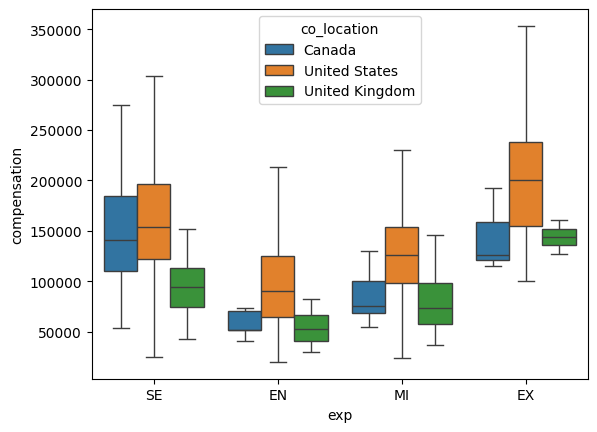

The United States pays higher salaries across all experience levels.
Pay appears to be most similar in the SE class of experience level. (Senior)


In [4]:
ax = sns.boxplot(x='exp', y='compensation', hue='co_location', data=df2, showfliers=False)
plt.show()

print('The United States pays higher salaries across all experience levels.')
print('Pay appears to be most similar in the SE class of experience level. (Senior)')

### Q1.3 - <span style="color:red">[18]</span> - Eventually, we want to train a regularized regression model to predict salary. With this in mind, for this question, prepare the data for that stage. For the preparation phase, you should use applicable techniques and knowledge covered during the term, but ignore statistical significance of categorical attributes, also, ignore studying pairwise relationships between attributes and/or target. Once you are done with all your preprocessings, split the data into training and test sets with a test set size of 20%.

In [5]:
df3 = pd.get_dummies(df2, columns=['exp', 'emp_title', 'co_location', 'co_size'], drop_first=True)
df3 = df3.dropna()
y = df3['compensation']

# longitude and latitude would actually be useful (e.g. California pay is probably higher than Montana pay,
# but we don't have any provided useful functions for getting e.g. the region from longitude/latitude,
# so we'll just drop them for now since "Country" encapsulates some of the information for the region
X = df3.drop(['compensation', 'emp_location', 'emp_ID'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

### Q1.4 - <span style="color:red">[20]</span> - Train a regression model which uses the following loss function for training:
$$J(\beta)=MSE(\beta)+\lambda(r\sum_{i=1}^n |\beta_i|+\frac{1-r}{2}\sum_{i=1}^n\beta_i^2).$$

With $\lambda=2$, your model must use a 5-fold cross-validation to find the best value among $[0.1, 0.4, 0.8, 1]$ for the $l_1$ ratio. What is the best value for $l_1$ that you find?

In [6]:
from sklearn.metrics import mean_squared_error
l1_ratios = [0.1, 0.4, 0.8, 1]
# 5-fold cross-validatoin to find best l1 ratio
elasticnet_cv = ElasticNetCV(l1_ratio=l1_ratios, cv=5, random_state=seed)
elasticnet_cv.fit(X_train, y_train)
best_l1_ratio = elasticnet_cv.l1_ratio_

model = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('elastic_net', ElasticNet(alpha=2, l1_ratio=best_l1_ratio)),
])
model.fit(X_train, y_train)

print('Best l1 ratio: ', best_l1_ratio)

Best l1 ratio:  1.0


### Q1.5 - <span style="color:red">[15]</span> - Report the training and generalization RMSE of your model as well as the mean and standard deviation of its shuffled cross-validation RMSE over 5 folds. Comment on the performance of this model in the context of overfitting/underfitting.

In [7]:
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('Training RMSE:', rmse(y_train, y_train_pred))
print('Test RMSE:', rmse(y_test, y_test_pred))

def rmse_cross_val(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    rmse_scores = []
    for index_train, index_test in kf.split(X):
        X_train, X_test = X.iloc[index_train], X.iloc[index_test]
        y_train, y_test = y.iloc[index_train], y.iloc[index_test]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        rmse_scores.append(rmse(y_test, y_test_pred))
    return rmse_scores

rmses = rmse_cross_val(model, X, y)
print('Mean CV RMSE:', np.mean(rmses))
print('Stddev CV RMSE:', np.std(rmses))



Training RMSE: 47969.03328209858
Test RMSE: 50785.232878906434
Mean CV RMSE: 51151.74924577192
Stddev CV RMSE: 2066.939132714478


Since the training and test RMSEs are approximately similar (the training RMSE is slightly lower than the test RMSE), the model is likely not overfitting.

However, the errors are still high even on the training data: the model has trouble fitting to the training data so it is underfitting.

### Q1.6 - <span style="color:red">[10]</span> - Plot a bar plot showing feature importance for your model for the top 10 attributes.

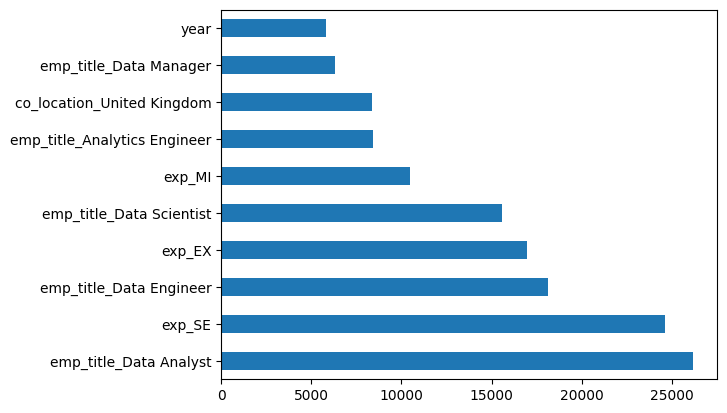

In [8]:
coeffs = pd.Series(abs(model.named_steps['elastic_net'].coef_), index=X_train.columns)
coeffs.nlargest(10).plot(kind='barh')
plt.show()


### Q1.7 - <span style="color:red">[10]</span> - Calculate the confidence interval based on a confidence level of 95$ for the mean of predictions by bootstrapping.

In [16]:
def bootstrap_pred(model, X_train, y_train, X_test, y_test, numboot=1000):
    n = len(X_train)
    y_pred = np.zeros((numboot, X_test.shape[0]))
    for i in range(numboot):
        index = np.random.randint(0, n, 100)
        model.fit(X_train.iloc[index], y_train.iloc[index])
        y_pred[i,:] = model.predict(X_test)
    return y_pred

ypred_boot = np.mean(bootstrap_pred(model, X_train, y_train, X_test, y_test))

boot_cl = 0.95
p_1 = (1 - boot_cl) / 2
p_2 = 1 - p_1
p_y = np.mean(model.predict(X_test))
boot_quant = np.quantile(ypred_boot - p_y, [p_1, p_2])
boot_ci = (p_y - boot_quant[1], p_y + boot_quant[0])

print('Bootstrap CI:', boot_ci)

Bootstrap CI: (56653.28186788905, 63883.72218755116)
